<a href="https://colab.research.google.com/github/EstefRZ99/data-analysis-explorations/blob/main/dataset__marriages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Maria Estefanny Ramírez Zuñiga

Universidad CENFOTEC


Introducción

En este laboratorio se analizará la base de datos de matrimonios en Costa Rica correspondiente al primer semestre de 2023, publicada por el INEC. El objetivo principal es consolidar y procesar la información para obtener una visión detallada de los matrimonios totales, sin distinción de sexos, permitiendo agrupar los datos por criterios clave como la provincia de residencia y los rangos de edad de los contrayentes. Para ello, se definirán categorías específicas de edades que facilitarán el análisis demográfico.
El proceso de trabajo se estructurará en varias etapas: inicialmente se procederá a la adquisición y preprocesamiento de los datos, seguido de una exhaustiva limpieza y transformación de la información. Se pondrá especial énfasis en corregir inconsistencias, tratar los valores faltantes y asegurar la homogeneidad de los datos. Posteriormente, se evaluará la reducción de dimensionalidad y se realizará una selección de características relevantes para optimizar el análisis.
Además, se explorarán otros posibles criterios de agrupamiento, tales como la segmentación por cantón o por períodos temporales, lo que permitirá ampliar la comprensión de la dinámica matrimonial en el país. Este enfoque integral no solo facilitará la identificación de patrones y tendencias, sino que también servirá de base para futuras investigaciones y la toma de decisiones informadas.







In [ ]:
import pandas as pd

In [ ]:
# Recargar el CSV
c4_path = '/content/Matrimonios2023.xlsx - C4.csv'
df_c4 = pd.read_csv(c4_path)

In [ ]:
# Revisar primeras filas para ver su estructura
df_c4.head(10)

,CUADRO 4,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,"Costa Rica. Total de matrimonios por sexo, seg...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VOLVER AL ÍNDICE
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Provincia de ocurrencia,Hombres,NaN,NaN,NaN,Mujeres,NaN,NaN,NaN,NaN
3,NaN,Total,Con mujeres,Con hombres,NaN,Total,Con hombres,Con mujeres,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Costa Rica,10 840,10 661,179,NaN,10 823,10 661,162,NaN,NaN
6,San José,3 465,3 377,88,NaN,3 451,3 377,74,NaN,NaN
7,Alajuela,2 372,2 346,26,NaN,2 372,2 346,26,NaN,NaN
8,Cartago,999,990,9,NaN,1 001,990,11,NaN,NaN
9,Heredia,1 179,1 155,24,NaN,1 178,1 155,23,NaN,NaN


In [ ]:
#Limpieza
# Eliminar las primeras filas que no contienen datos relevantes
df_c4_clean = df_c4.iloc[5:].reset_index(drop=True)

In [ ]:
# Renombrar las columnas relevantes
df_c4_clean.columns = ['Provincia', 'Total_Hombres', 'Hombres_Con_Mujeres', 'Hombres_Con_Hombres',
                       'Unused1', 'Total_Mujeres', 'Mujeres_Con_Hombres', 'Mujeres_Con_Mujeres',
                       'Unused2', 'Unused3']

In [ ]:
# Eliminar columnas innecesarias (las 'Unused')
df_c4_clean = df_c4_clean[['Provincia', 'Total_Hombres', 'Hombres_Con_Mujeres',
                           'Hombres_Con_Hombres', 'Total_Mujeres', 'Mujeres_Con_Hombres',
                           'Mujeres_Con_Mujeres']]

In [ ]:
# Eliminar filas vacías o de totales no relevantes (VOLVER AL ÍNDICE)
df_c4_clean = df_c4_clean.dropna(subset=['Provincia'])

In [ ]:
# Limpiar los números (quitar espacios y convertirlos a enteros)
for col in df_c4_clean.columns[1:]:
    # Replace spaces and convert to numeric, handling errors
    df_c4_clean[col] = pd.to_numeric(df_c4_clean[col].str.replace(' ', ''), errors='coerce')
    # Convert to integers, filling NaNs with 0 if needed
    df_c4_clean[col] = df_c4_clean[col].fillna(0).astype(int)

In [ ]:
# Ver el resultado limpio
import pandas as pd

def display_dataframe_to_user(name, dataframe):
    """
    Displays the dataframe with a given name.

    This is a placeholder for a hypothetical 'ace_tools' functionality.
    If you have a real 'ace_tools' module, please install it and use that instead.
    """
    print(f"Dataframe: {name}")
    print(dataframe)

# Assuming df_c4_clean is your dataframe
display_dataframe_to_user(name="Matrimonios por Provincia y Sexo (C4 Limpio)", dataframe=df_c4_clean)

Dataframe: Matrimonios por Provincia y Sexo (C4 Limpio)
                                           Provincia  Total_Hombres  \
0                                         Costa Rica          10840   
1                                           San José           3465   
2                                           Alajuela           2372   
3                                            Cartago            999   
4                                            Heredia           1179   
5                                         Guanacaste            855   
6                                         Puntarenas           1126   
7                                              Limón            844   
8  Fuente: INEC-Costa Rica. Estadísticas vitales,...              0   

   Hombres_Con_Mujeres  Hombres_Con_Hombres  Total_Mujeres  \
0                10661                  179          10823   
1                 3377                   88           3451   
2                 2346                   26    

In [ ]:
for col in df_c4_clean.columns[1:]:
    df_c4_clean[col] = df_c4_clean[col].astype(str).str.replace(' ', '').replace('nan', '0').astype(int)


In [ ]:
df_c4_clean.head()

,Provincia,Total_Hombres,Hombres_Con_Mujeres,Hombres_Con_Hombres,Total_Mujeres,Mujeres_Con_Hombres,Mujeres_Con_Mujeres
0,Costa Rica,10840,10661,179,10823,10661,162
1,San José,3465,3377,88,3451,3377,74
2,Alajuela,2372,2346,26,2372,2346,26
3,Cartago,999,990,9,1001,990,11
4,Heredia,1179,1155,24,1178,1155,23


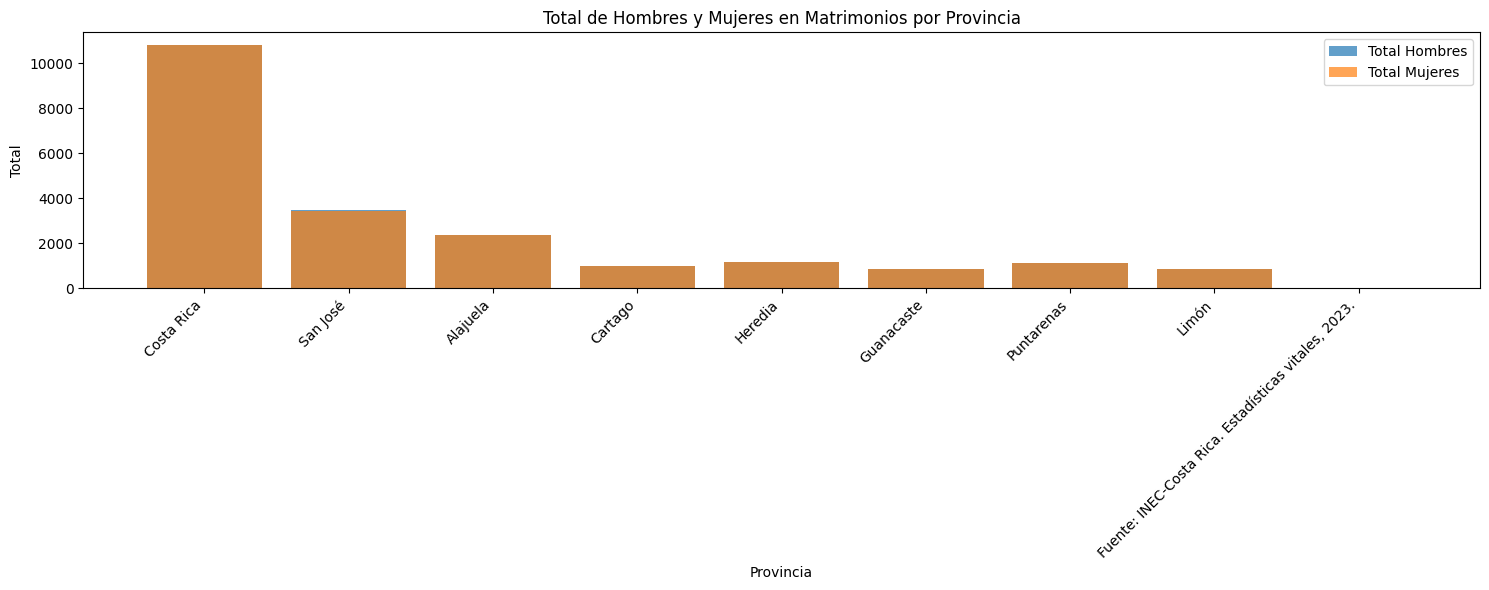

In [ ]:
# prompt: haz un grafico de esto

import matplotlib.pyplot as plt

# Selecciona las columnas que quieres graficar (por ejemplo, Total de Hombres y Total de Mujeres)
x_values = df_c4_clean['Provincia']
y_values_hombres = df_c4_clean['Total_Hombres']
y_values_mujeres = df_c4_clean['Total_Mujeres']

# Crea el gráfico de barras
plt.figure(figsize=(15, 6))  # Ajusta el tamaño del gráfico
plt.bar(x_values, y_values_hombres, label='Total Hombres', alpha=0.7)
plt.bar(x_values, y_values_mujeres, label='Total Mujeres', alpha=0.7)

# Añade etiquetas y título
plt.xlabel('Provincia')
plt.ylabel('Total')
plt.title('Total de Hombres y Mujeres en Matrimonios por Provincia')
plt.xticks(rotation=45, ha='right')  # Rota las etiquetas del eje x para mejor legibilidad
plt.legend()

# Muestra el gráfico
plt.tight_layout()  # Ajusta el diseño para evitar superposición
plt.show()


Conclusión

La mayoría de los matrimonios en Costa Rica durante el primer semestre de 2023 fueron entre hombre y mujer, especialmente concentrados en San José, la provincia con más registros. Las uniones entre personas del mismo sexo, aunque mucho menores en cantidad, están presentes en todas las provincias, reflejando un avance hacia la inclusión. Provincias como Limón y Guanacaste registran los menores números de matrimonios, acorde con su población.



Dataset C4 – Matrimonios por provincia y sexo:
San José tiene la mayor cantidad de matrimonios, seguido de Alajuela y Heredia.
Predominan los matrimonios hombre-mujer en todas las provincias.
Las uniones entre personas del mismo sexo (hombre-hombre y mujer-mujer) existen en todas las provincias, pero representan una porción muy pequeña del total.
Provincias con menor número de matrimonios: Limón y Guanacaste, lo cual puede relacionarse con su menor densidad poblacional y condiciones socioeconómicas.